In [1]:
## note these to add w/Poetry to the Dockerfile
%pip install pandas
%pip install networkx
%pip install scipy

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy.spatial.distance import pdist
from tensorflow.keras.layers import Dense, Lambda
from tensorflow.keras import Model
from tensorflow.keras.constraints import NonNeg 
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [3]:
url = 'http://cs.bc.edu/~prudhome/AAPLD/animal-similarity.csv'

raw_dataset = pd.read_csv(url, index_col=0)
list_of_animal_pairs = raw_dataset.index.str.split('~')

In [4]:
animal_pair_data = pd.DataFrame.from_records(list_of_animal_pairs, columns=['first_animal', 'second_animal'], index= raw_dataset.index)

In [5]:
animal_pair_data.sort_values(by = ['first_animal', 'second_animal'], inplace=True)

In [6]:
unique_animals = set(animal_pair_data.first_animal).union(animal_pair_data.second_animal)

In [7]:
animal_pairs = nx.Graph()
animal_pairs.add_nodes_from(unique_animals)
animal_pairs.add_edges_from(list_of_animal_pairs)

In [8]:
low_degree=[k for k,v in animal_pairs.degree._nodes.items() if len(v) < 32]

In [9]:
animal_pairs.remove_nodes_from(low_degree)

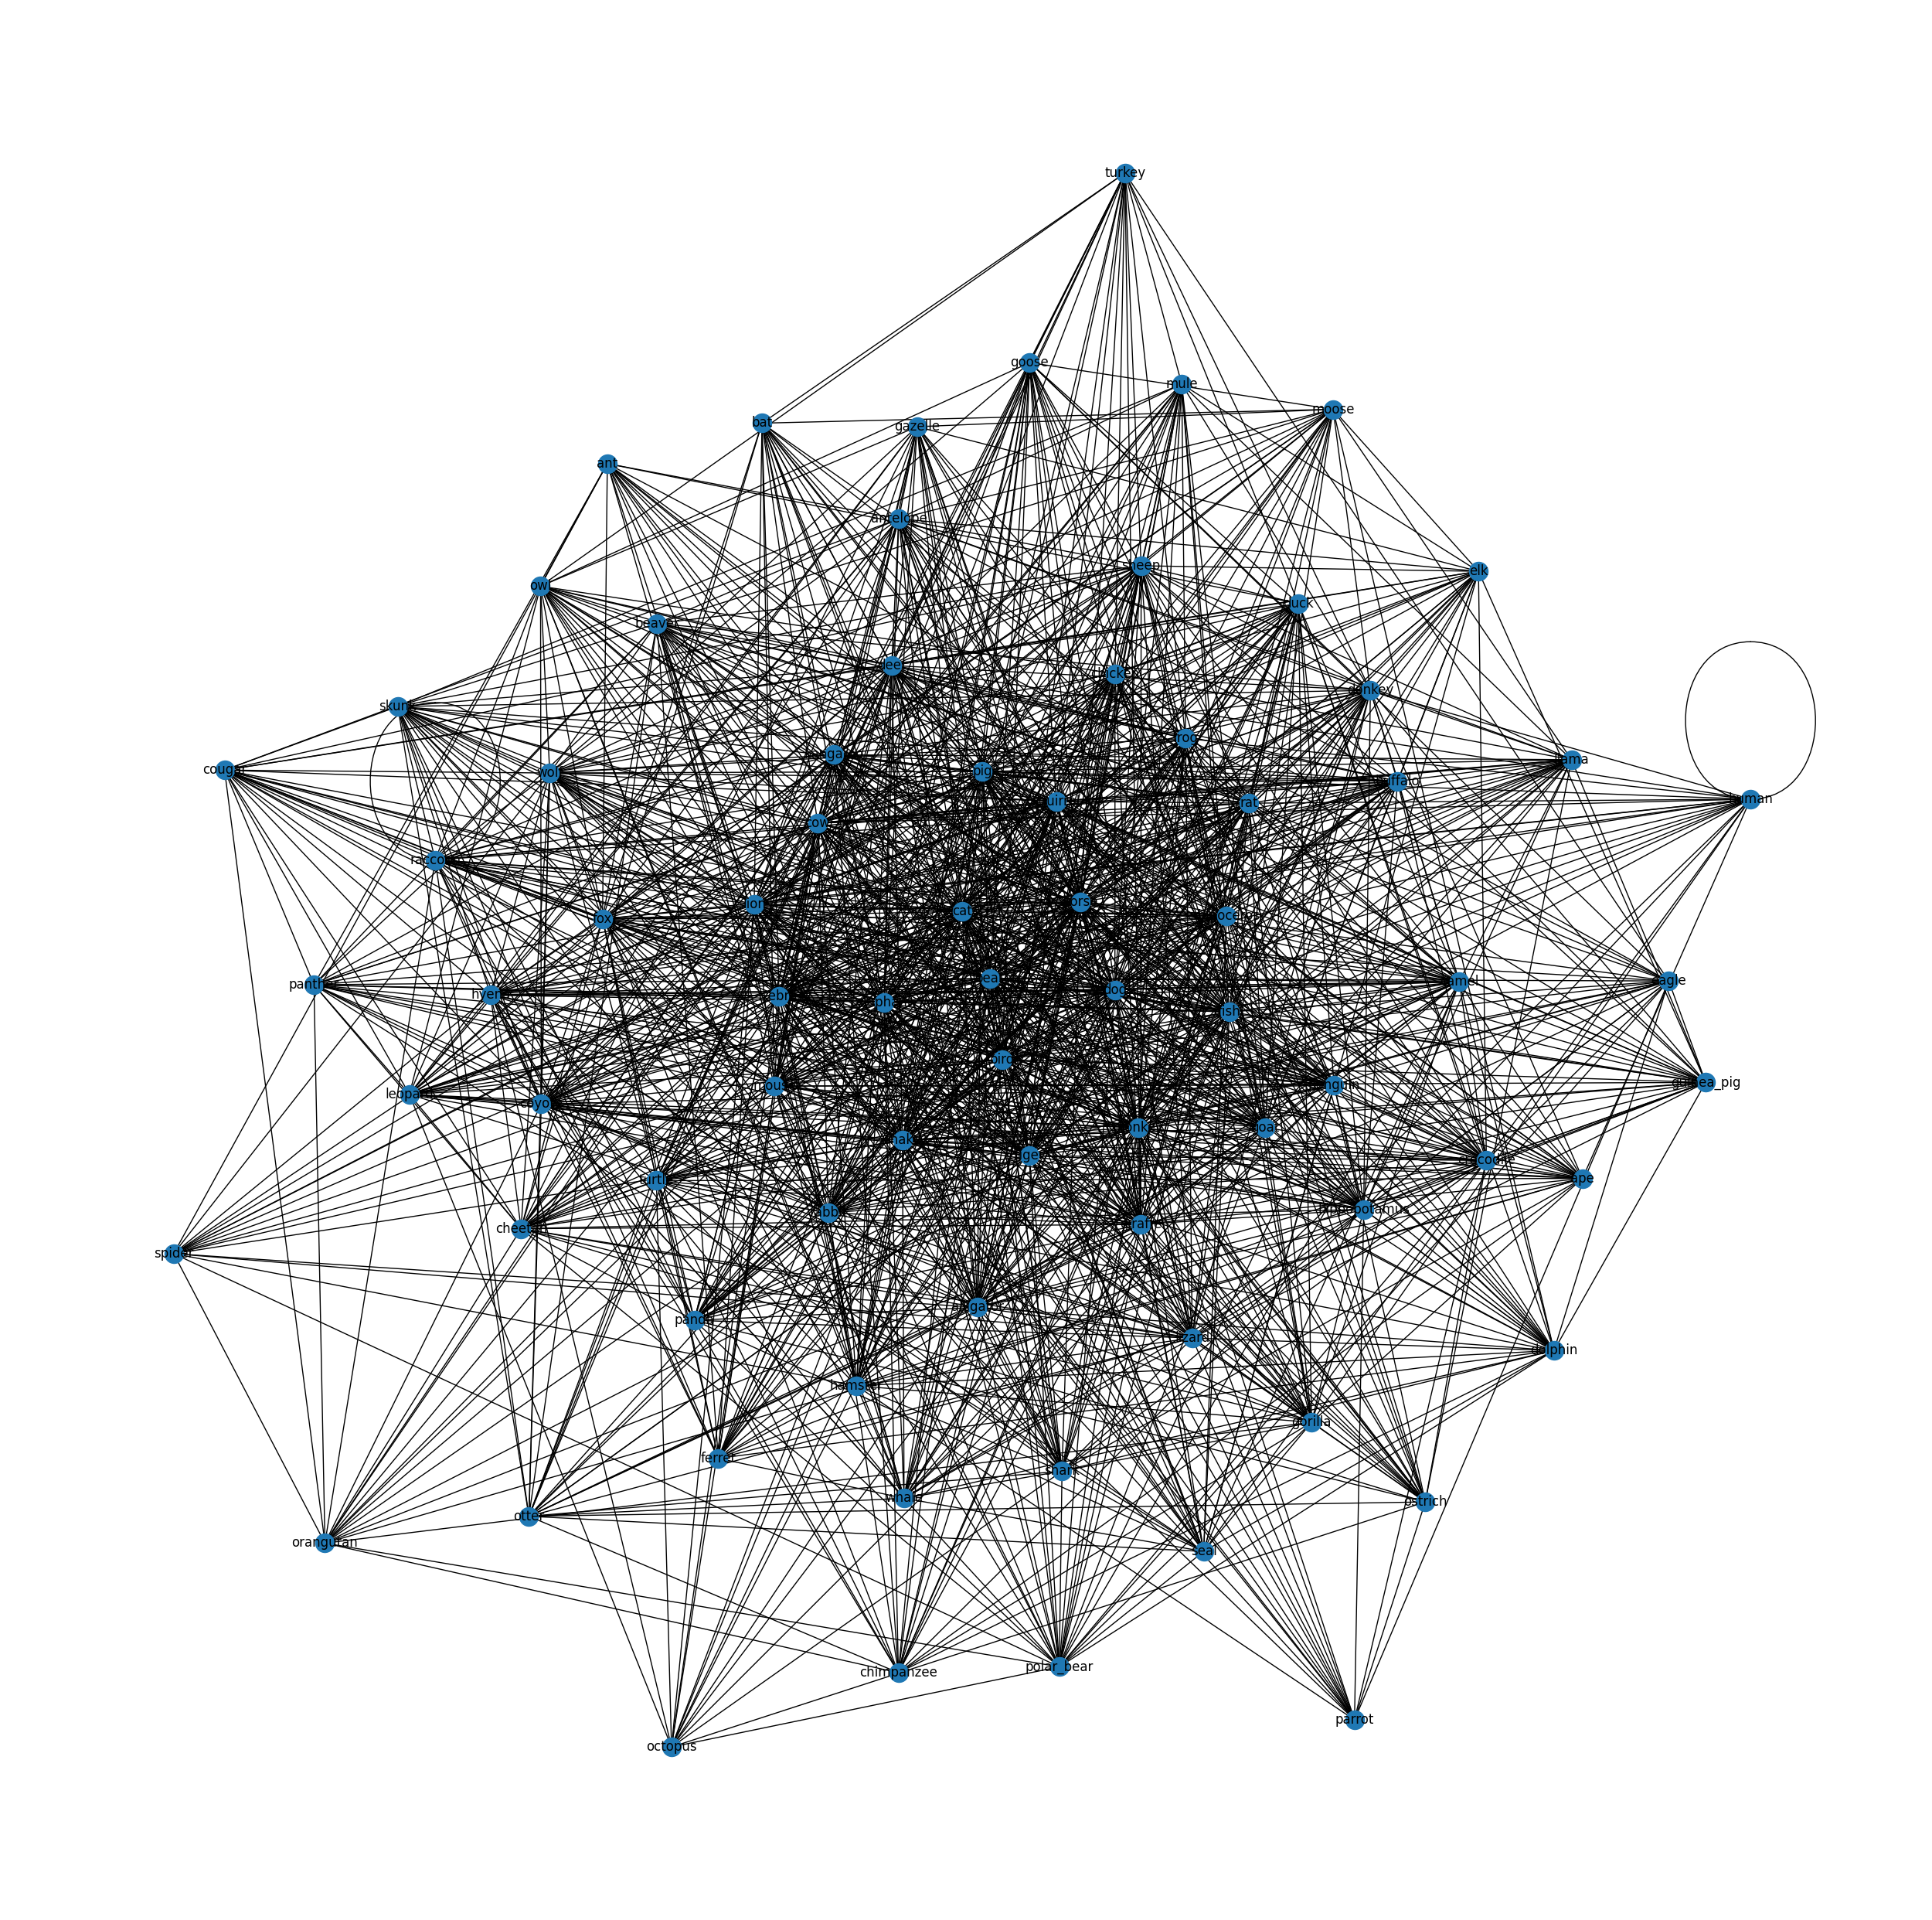

In [10]:
fig, ax = plt.subplots(figsize=(32,32))
nx.draw(animal_pairs, with_labels=True, ax=ax)

plt.show()

In [11]:
connected_list = [x for x in animal_pairs.nodes]

In [12]:
# try the small list, or, failing that, just the apes

In [13]:
smaller_animal_pair_data=animal_pair_data.loc[animal_pair_data['first_animal' ].isin( connected_list) & animal_pair_data['second_animal' ].isin( connected_list) ] 

In [14]:
joined_data=smaller_animal_pair_data.join(raw_dataset).drop(columns='[All_Ratings]')

In [15]:
big_matrix = pd.DataFrame(index=connected_list, columns = connected_list)

In [16]:
joined_data

first_animal second_animal  Average_Rating
Pair                                                         
alligator~antelope    alligator      antelope           1.940
alligator~bird        alligator          bird           2.080
alligator~buffalo     alligator       buffalo           1.080
alligator~elephant    alligator      elephant           1.140
alligator~fish        alligator          fish           1.000
...                         ...           ...             ...
zebra~seal                zebra          seal           1.040
zebra~shark               zebra         shark           1.067
zebra~snake               zebra         snake           1.880
zebra~tiger               zebra         tiger           2.720
zebra~turtle              zebra        turtle           1.120

[1601 rows x 3 columns]

In [17]:
#TODO wrap below section into functions

In [18]:
for row in joined_data.iterrows():
    big_matrix.loc[row[1].first_animal][row[1].second_animal] = row[1].Average_Rating
    big_matrix.loc[row[1].second_animal][row[1].first_animal] = row[1].Average_Rating

In [19]:
big_matrix = big_matrix.astype(float)

In [20]:
# big_matrix = big_matrix[big_matrix.isna().mean(1) < 0.5]
# big_matrix = big_matrix[big_matrix.index.to_list()]

In [21]:
big_matrix = big_matrix[big_matrix.isna().mean(1) < 0.33]

In [22]:
big_matrix = big_matrix[big_matrix.index.to_list()]

In [23]:
plt.matshow(big_matrix)

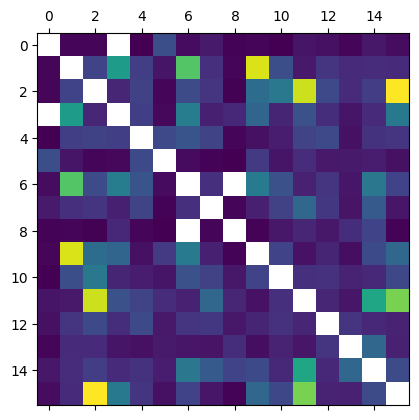

In [24]:
plt.show()

In [25]:
big_matrix.isna().mean(1)

fish        0.1250
horse       0.0625
lion        0.0625
cow         0.1250
bear        0.0625
snake       0.0625
deer        0.1250
pig         0.0625
bird        0.1250
zebra       0.0625
giraffe     0.0625
cat         0.0625
elephant    0.0625
monkey      0.0625
dog         0.0625
tiger       0.0625
dtype: float64

In [26]:
big_matrix.shape

(16, 16)

In [27]:
big_matrix

fish  horse   lion    cow   bear  snake  deer    pig  bird  zebra  \
fish        NaN  1.100  1.067    NaN  1.000   2.26  1.18  1.370  1.06  1.080   
horse     1.100    NaN  2.040  3.860  1.960   1.30  4.82  1.720  1.08  5.917   
lion      1.067  2.040    NaN  1.560  2.020   1.10  2.20  1.780  1.04  2.840   
cow         NaN  3.860  1.560    NaN  1.960   1.11  3.22  1.460  1.58  2.700   
bear      1.000  1.960  2.020  1.960    NaN   2.16  2.36  2.080  1.10  1.240   
snake     2.260  1.300  1.100  1.110  2.160    NaN  1.16  1.060  1.00  1.880   
deer      1.180  4.820  2.200  3.220  2.360   1.16   NaN  1.700   NaN  3.180   
pig       1.370  1.720  1.780  1.460  2.080   1.06  1.70    NaN  1.10  1.460   
bird      1.060  1.080  1.040  1.580  1.100   1.00   NaN  1.100   NaN  1.060   
zebra     1.080  5.917  2.840  2.700  1.240   1.88  3.18  1.460  1.06    NaN   
giraffe   1.020  2.250  3.100  1.540  1.425   1.30  2.30  2.020  1.34  2.040   
cat       1.300  1.360  5.820  2.300  2.080   1.66  1.48  2.717  1.56  1.260   
elephant  1.240  1.800  2.160  1.683  2.160   1.36  1.80  1.840  1.34  1.550   
monkey    1.100  1.640  1.640  1.290  1.240   1.38  1.32  1.280  1.68  1.200   
dog       1.340  1.660  1.940  1.620  1.760   1.42  3.06  2.480  2.05  2.175   
tiger     1.180  1.620  6.220  3.117  1.780   1.24  2.04  1.320  1.06  2.720   

          giraffe    cat  elephant  monkey    dog  tiger  
fish        1.020  1.300     1.240    1.10  1.340  1.180  
horse       2.250  1.360     1.800    1.64  1.660  1.620  
lion        3.100  5.820     2.160    1.64  1.940  6.220  
cow         1.540  2.300     1.683    1.29  1.620  3.117  
bear        1.425  2.080     2.160    1.24  1.760  1.780  
snake       1.300  1.660     1.360    1.38  1.420  1.240  
deer        2.300  1.480     1.800    1.32  3.060  2.040  
pig         2.020  2.717     1.840    1.28  2.480  1.320  
bird        1.340  1.560     1.340    1.68  2.050  1.060  
zebra       2.040  1.260     1.550    1.20  2.175  2.720  
giraffe       NaN  1.700     1.740    1.50  1.600  2.125  
cat         1.700    NaN     1.560    1.32  4.080  5.160  
elephant    1.740  1.560       NaN    1.81  1.600  1.500  
monkey      1.500  1.320     1.810     NaN  2.720  1.480  
dog         1.600  4.080     1.600    2.72    NaN  2.200  
tiger       2.125  5.160     1.500    1.48  2.200    NaN

In [28]:
# todo make into function
similarities = big_matrix.to_numpy()
similarity_vec = np.tril(similarities, -1)
similarity_vec = similarity_vec[np.nonzero(similarity_vec)]

In [29]:
# FIll in NA's 

In [30]:
similarity_vec = np.nan_to_num(similarity_vec, nan=min(similarity_vec))

In [31]:
dissimilarity_vec = np.exp(-1*similarity_vec)

In [32]:
len(dissimilarity_vec) 
# :=Y  = n(n-1)/2
# 2Y = n^2 - n
# 0 = n^2 - n - 2Y

# 0 = (n - 1/2) ^2 - 1/4 - 2Y 
# 2Y + 1/4 = (n - 1/2)^2
# N = 1/2 + sqrt(2Y + 1/4)


120

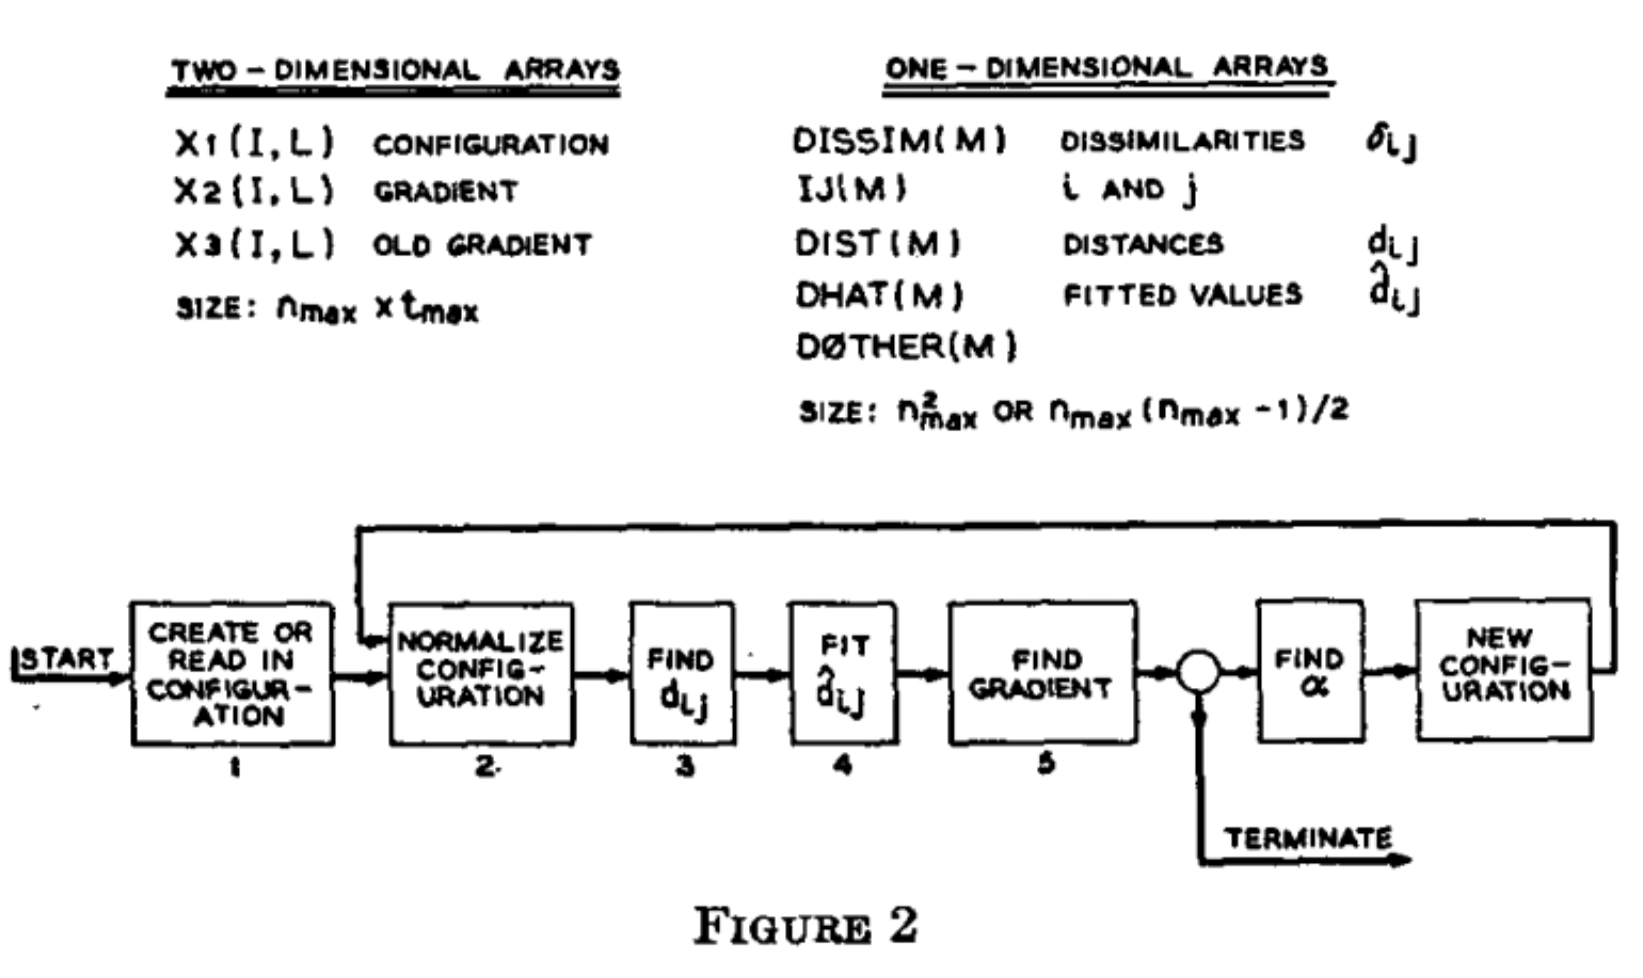
From Kruskal, 1964

Idea is to follow these steps, 

In [33]:
def generate_starting_configuration(dis_vec, n_points, dim=2):
    ## Generate kruskal_style t-dimensional starting configuration
    #  N = 1/2 + sqrt(2Y + 1/4)

    assert n_points == int(1/2 + np.sqrt(2*len(dis_vec) +1/4))
    
    max_multiplier = n_points//dim + 2
    #say 503 points in2 dim, then we need 252 diags, drop the last row of the last one , s0 have to go from 
    # 1 to n_points/dim +2
    starting_config = np.vstack([np.diag(j*np.ones(dim)) for j in range(1,max_multiplier)])
    return starting_config[:n_points,:]


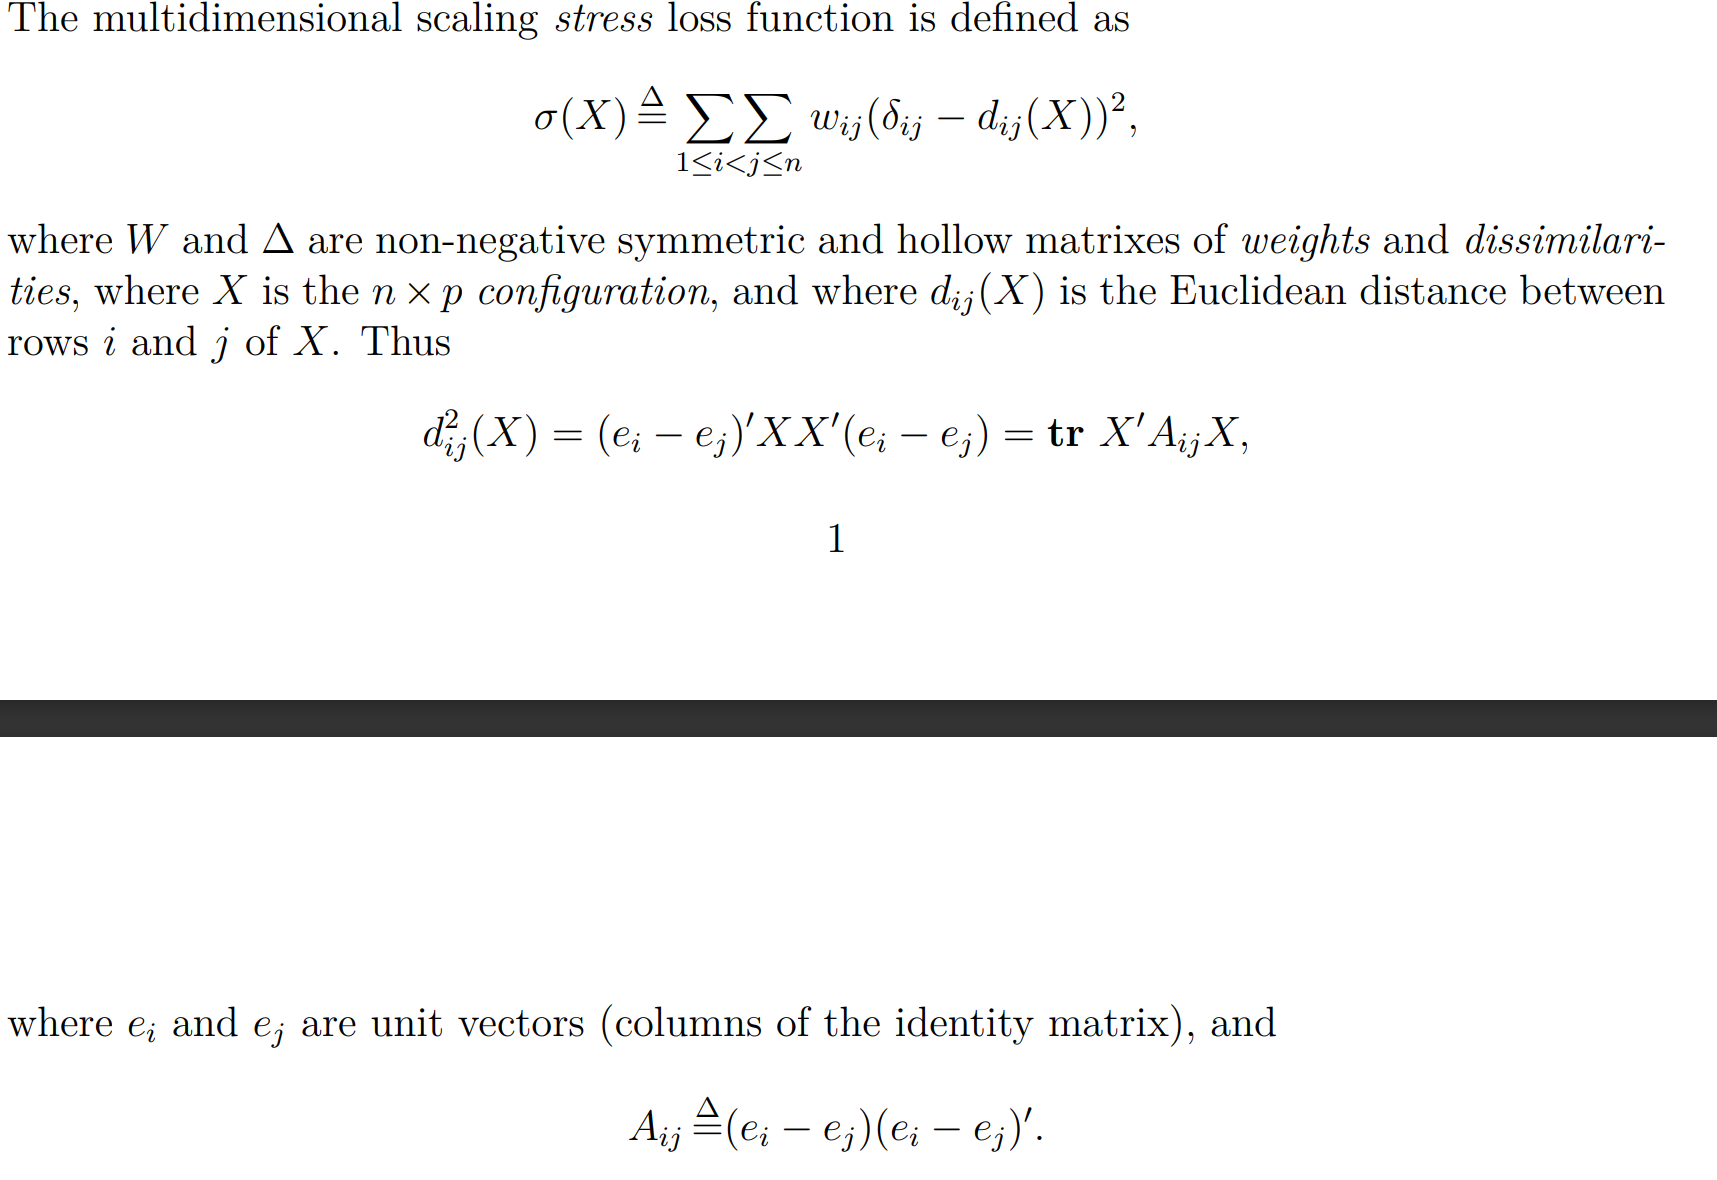
From https://jansweb.netlify.app/publication/deleeuw-e-18-c/
NB: $\delta_{ij}$ here is the true dissimilarity between $i$ and $j$ 

In [34]:
## TODO move to matrix_utils.py 
## MAYBE rewrite in pure tensorflow
### need config_dim 
### -> then apply np.outer on each to get Aij
def self_outer(basis_vector:np.array)->np.array:
    return np.outer(basis_vector, basis_vector)
    

def pairwise_basis_diffs(max_index:int, max_rows:int)->np.array:
  
    assert max_index > 1 ## ignore first basis vector  
    eye_ref = np.eye(N=max_rows, M = max_index)
    
    # for index i and all other indices j less than it , build a 2-d array of (e_is - e_js)s
    # by subtracting highest indexed basis vector from all other basis vectors 
    ei_minus_ejs = eye_ref[:,:-1] - eye_ref[:,-1].reshape(max_rows,1)
    # find outer-product with self for each difference of basis columns (these are the A_ij s) 
    # where i is fixed at index 
    outer_list = np.apply_along_axis(func1d=self_outer, axis=0, arr=ei_minus_ejs)
    return outer_list 
### then apply func1d on Aijs 
def pairwise_dist_block_chunk(outer_distance:np.array, configuration:np.array):
    # Compute tr X'A_ij X 
    return np.trace(configuration.T @ outer_distance @ configuration)
    
## then, use listcomp to get chunk of pairwise distances and vstack the pairwise distances 
def pairwise_dist_within_block(outer_list:np.array, configuration:np.array)->np.array:
    pairwise_dist_in_block = [pairwise_dist_block_chunk(outer_list[:,:,k], configuration) for k in range(outer_list.shape[2]) ]
    return np.array(pairwise_dist_in_block)

def pairwise_dists_of_block(index:int, configuration:np.array)->np.array:
    outerL = pairwise_basis_diffs(index, configuration.shape[0])
    return pairwise_dist_within_block(outerL, configuration)

## wrap 
def get_pairwise_distances(configuration):
    ## Wrapper for pairwise distance function (if prep needed)
    return np.hstack([pairwise_dists_of_block(i, configuration) for  i in range(2, configuration.shape[0]+1)])



In [35]:
## todo move to pdistlayer.py
## convert to tensorflow
def tf_get_pw_dist(tensorconfig:tf.Tensor)->tf.Tensor:
    dhat = tf.expand_dims(tf.py_function(func = get_pairwise_distances, inp = [tensorconfig], Tout=tf.float64, name="pairwise_dist"),-1)
    return dhat

In [36]:
## wrap pairwise distance in a layer
class PDistLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(PDistLayer, self).__init__()
        
    def call(self, inputs):
        return tf_get_pw_dist(inputs)

In [37]:
#todo move to mdsmodel.py
class MDSModel(Model):
    def __init__(self):
        super(MDSModel, self).__init__()
        self.distance = PDistLayer()
        self.d1 = Dense(128, activation='relu', kernel_constraint=NonNeg())
        self.d2 = Dense(1, activation='relu', kernel_constraint=NonNeg())

    def call(self, x):
        x = self.distance(x)
        x = self.d1(x)
        return self.d2(x)

# Create an instance of the model
model = MDSModel()

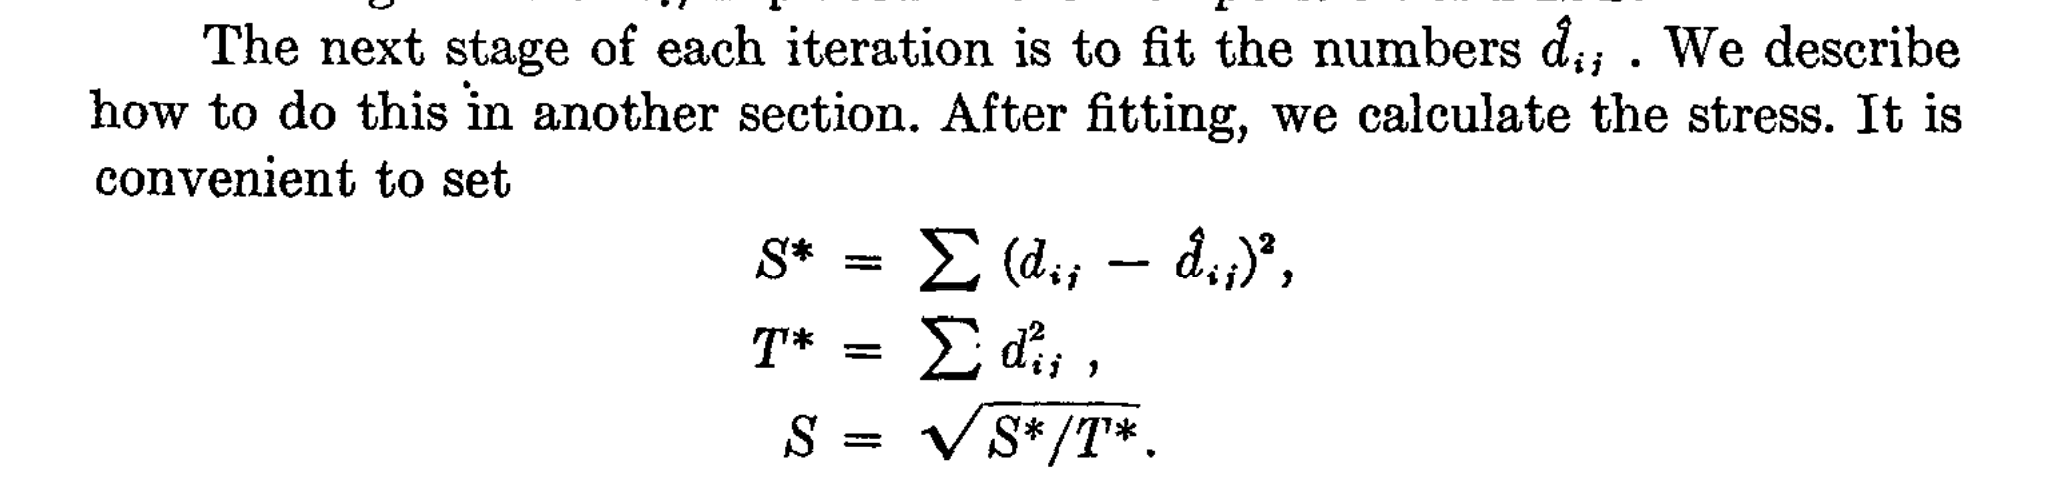
Stress Loss function from Kruskal, 1964

In [38]:
def stress(y_true, y_pred):
    Sstar = tf.math.reduce_sum(tf.math.square(y_true - y_pred),axis=-1)
    Tstar = tf.math.reduce_sum(tf.square(y_true),axis=-1)
    S = tf.math.sqrt(tf.math.divide_no_nan(Sstar,Tstar))
    return S  # Note the `axis=-1`

model.compile(optimizer='adam', loss=stress)

In [39]:
stress(tf.constant((1,3,3.)), tf.constant((6.,4,2)))

<tf.Tensor: shape=(), dtype=float32, numpy=1.1920791>

In [40]:
loss_object = stress
optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)

In [41]:
train_loss = tf.keras.metrics.Mean(name='train_loss')


In [42]:
@tf.function
def train_step(config, dis_vec):
    with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
        predictions = model(config, training=True)
        loss = loss_object(dis_vec, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    return predictions 

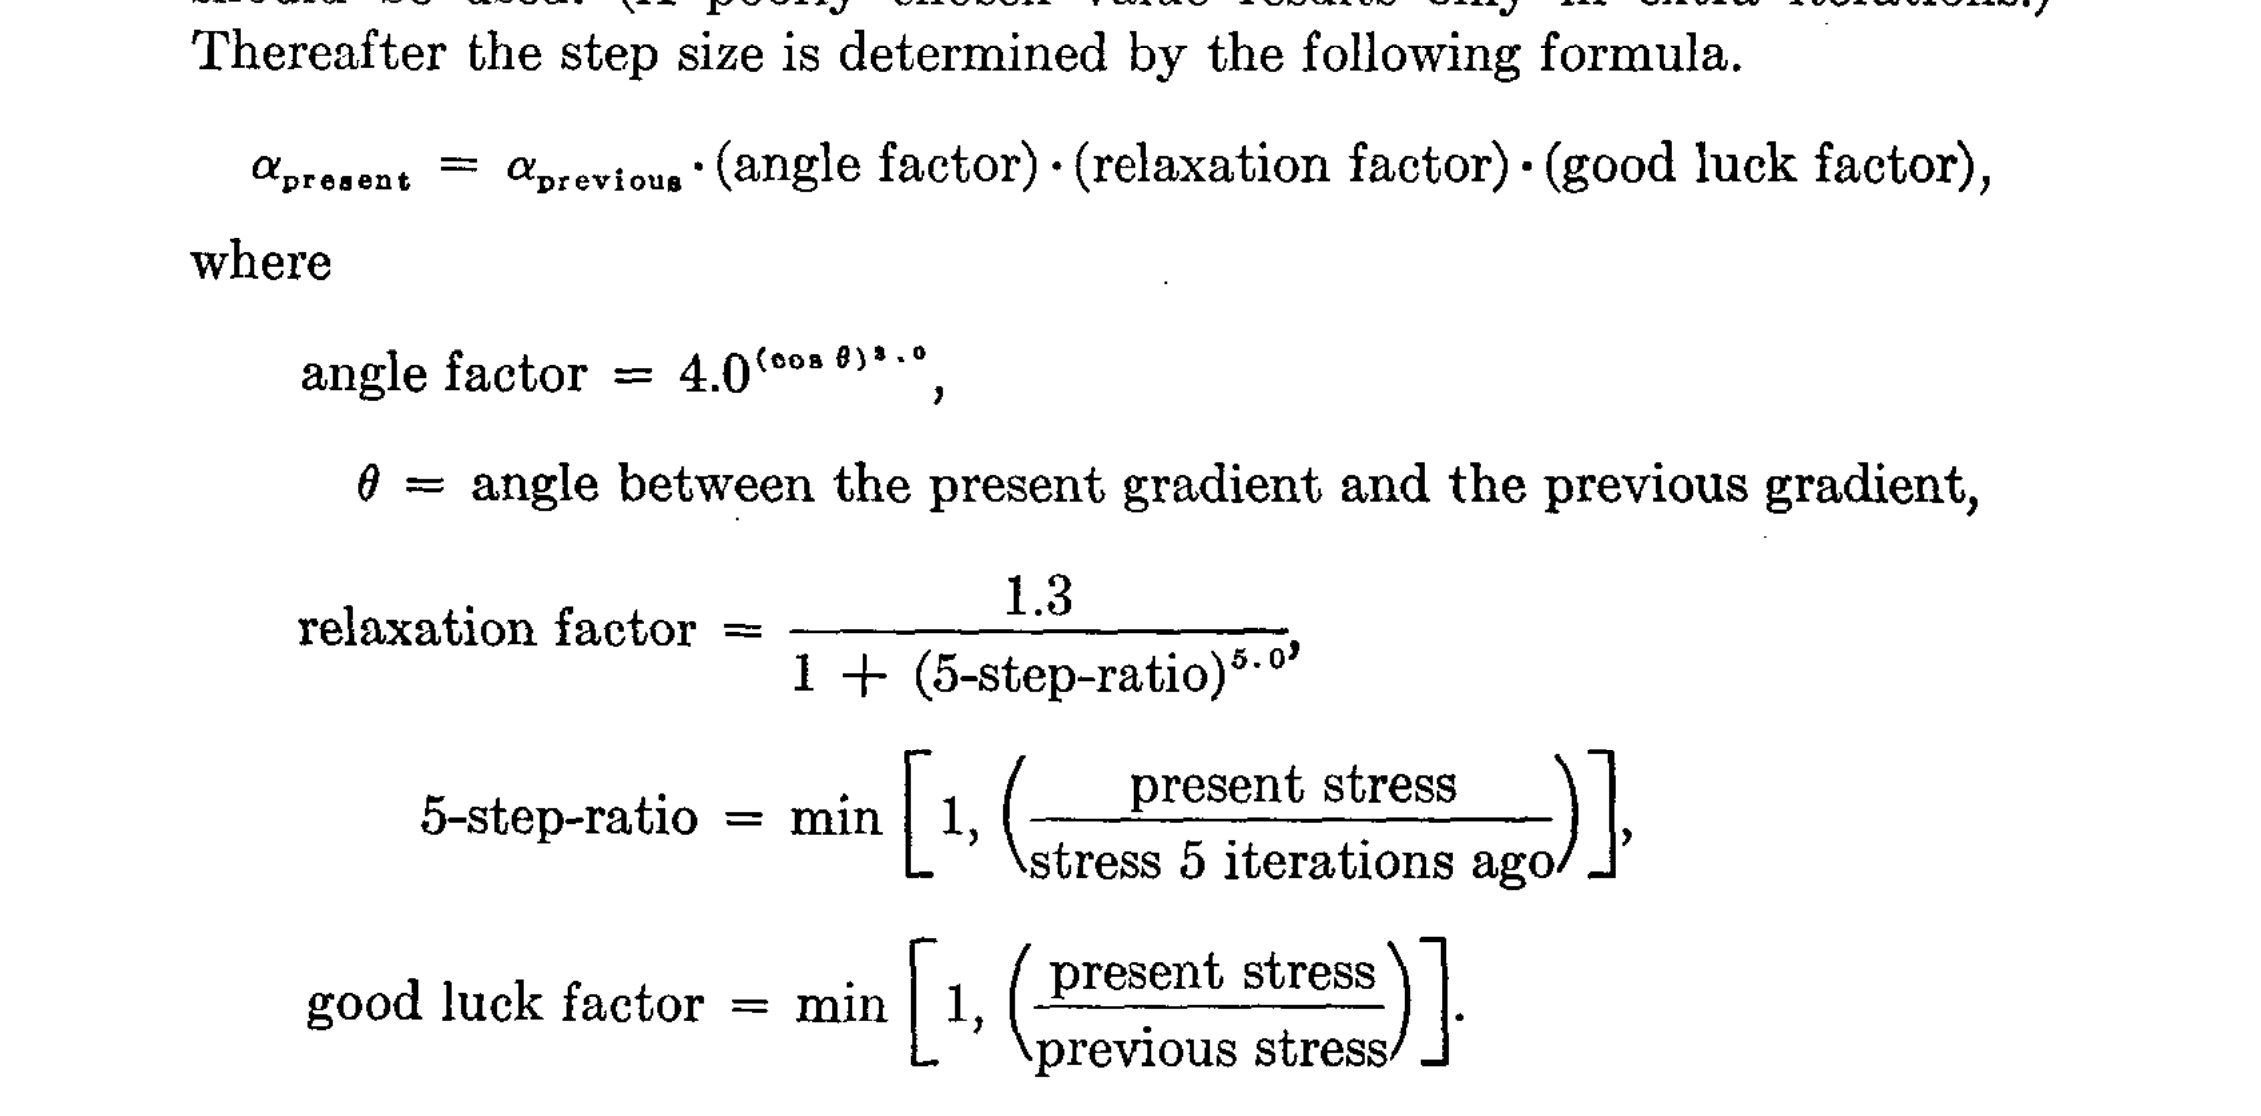
Optimizer from Kruskal, 1964

In [43]:
# todo make doctest for relevant fxs
index = 5
max_rows = 19
fake_dist_vec = np.ones(((max_rows**2 - max_rows)//2, 1))
eye_ref = np.eye(N=max_rows, M = index)
ei_minus_ejs =  eye_ref[:,:-1] - eye_ref[:,-1].reshape(max_rows,1)


In [44]:
test_outer = np.outer(ei_minus_ejs[:,3],ei_minus_ejs[:,3])
test_config = generate_starting_configuration(fake_dist_vec, max_rows)
outer_list = np.apply_along_axis(func1d=self_outer, axis=0, arr=ei_minus_ejs)

In [45]:
pairwise_dist_over_chunks = [pairwise_dist_block_chunk(outer_list[:,:,k], test_config) for k in range(outer_list.shape[2]) ]


In [46]:
pairwise_dist_over_chunks

[4.0, 10.0, 1.0, 13.0]

In [47]:
pairwise_dists_of_block(4, test_config)

array([5., 1., 8.])

In [48]:
np.array_equal(outer_list[:,:,3], np.outer(ei_minus_ejs[:,3],ei_minus_ejs[:,3]))

True

In [49]:
len(get_pairwise_distances(test_config))

171

In [50]:
len(fake_dist_vec)

171

In [51]:
tf_config = tf.convert_to_tensor(test_config)
tf_get_pw_dist(tf_config)

<tf.Tensor: shape=(171, 1), dtype=float64, numpy=
array([[  2.],
       [  1.],
       [  5.],
       [  5.],
       [  1.],
       [  8.],
       [  4.],
       [ 10.],
       [  1.],
       [ 13.],
       [ 10.],
       [  4.],
       [ 13.],
       [  1.],
       [ 18.],
       [  9.],
       [ 17.],
       [  4.],
       [ 20.],
       [  1.],
       [ 25.],
       [ 17.],
       [  9.],
       [ 20.],
       [  4.],
       [ 25.],
       [  1.],
       [ 32.],
       [ 16.],
       [ 26.],
       [  9.],
       [ 29.],
       [  4.],
       [ 34.],
       [  1.],
       [ 41.],
       [ 26.],
       [ 16.],
       [ 29.],
       [  9.],
       [ 34.],
       [  4.],
       [ 41.],
       [  1.],
       [ 50.],
       [ 25.],
       [ 37.],
       [ 16.],
       [ 40.],
       [  9.],
       [ 45.],
       [  4.],
       [ 52.],
       [  1.],
       [ 61.],
       [ 37.],
       [ 25.],
       [ 40.],
       [ 16.],
       [ 45.],
       [  9.],
       [ 52.],
       [  4.],
     

In [52]:
## Steps 
### Define configuration 
#### for each training iteration
#### normalize 
#### find pairwise distances
#### monotone regression
#### gradient descent



In [53]:
start_config = generate_starting_configuration(dissimilarity_vec, len(big_matrix.index))


In [54]:
disty = PDistLayer()

In [55]:
disty(tf_config)

<tf.Tensor: shape=(171, 1), dtype=float64, numpy=
array([[  2.],
       [  1.],
       [  5.],
       [  5.],
       [  1.],
       [  8.],
       [  4.],
       [ 10.],
       [  1.],
       [ 13.],
       [ 10.],
       [  4.],
       [ 13.],
       [  1.],
       [ 18.],
       [  9.],
       [ 17.],
       [  4.],
       [ 20.],
       [  1.],
       [ 25.],
       [ 17.],
       [  9.],
       [ 20.],
       [  4.],
       [ 25.],
       [  1.],
       [ 32.],
       [ 16.],
       [ 26.],
       [  9.],
       [ 29.],
       [  4.],
       [ 34.],
       [  1.],
       [ 41.],
       [ 26.],
       [ 16.],
       [ 29.],
       [  9.],
       [ 34.],
       [  4.],
       [ 41.],
       [  1.],
       [ 50.],
       [ 25.],
       [ 37.],
       [ 16.],
       [ 40.],
       [  9.],
       [ 45.],
       [  4.],
       [ 52.],
       [  1.],
       [ 61.],
       [ 37.],
       [ 25.],
       [ 40.],
       [ 16.],
       [ 45.],
       [  9.],
       [ 52.],
       [  4.],
     

In [56]:
altadista = Lambda(lambda x:tf_get_pw_dist(x) )

In [57]:
model(tf_config)

<tf.Tensor: shape=(171, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
 

In [58]:
# plt.scatter(dhat, dissimilarity_vec)
# plt.show()

In [59]:
# configuration.shape

In [60]:
# np.mean(configuration,0)

In [61]:
# configuration

In [62]:
## Training loop
N_EPOCHS = 20


In [63]:
# The monotone regression: wrap in function
configuration = deepcopy(start_config)
for epoch in range(N_EPOCHS):
    # normalize! 
    #TODO: Convert to pure tf
    configuration/=np.linalg.norm(configuration)
    # pairwise dist 
    ### Two options here: 
    #### 1. (suboptimal) use the "canned" formulas for the gradient and just use TF for the monotone regression
    #### 2. write the first layer after the inputs to compute pairwise distances and then to vectorize the lower tri, followed by a couple dense layers 

  # Reset the metrics at the start of the next epoch
    train_loss.reset_states()

    preds = train_step(configuration, dissimilarity_vec)
    
    # Now, apply the gradient of the stress to update the configuration 
    
    
    print(f'Epoch {epoch + 1}, Loss: {train_loss.result()}')
    

Epoch 1, Loss: 1.0
Epoch 2, Loss: 0.8910219669342041
Epoch 3, Loss: 1.41970694065094
Epoch 4, Loss: 0.5452159643173218
Epoch 5, Loss: 0.692368745803833
Epoch 6, Loss: 0.7639583349227905
Epoch 7, Loss: 0.6694259643554688
Epoch 8, Loss: 0.5352985262870789
Epoch 9, Loss: 0.4550231993198395
Epoch 10, Loss: 0.49563729763031006
Epoch 11, Loss: 0.5617096424102783
Epoch 12, Loss: 0.5697013735771179
Epoch 13, Loss: 0.541031539440155
Epoch 14, Loss: 0.5029072761535645
Epoch 15, Loss: 0.4693829119205475
Epoch 16, Loss: 0.45354408025741577
Epoch 17, Loss: 0.46284258365631104
Epoch 18, Loss: 0.4830302298069
Epoch 19, Loss: 0.49530619382858276
Epoch 20, Loss: 0.4916499853134155


In [64]:
# Derivative analyses


In [65]:
preds

<tf.Tensor: shape=(120, 1), dtype=float32, numpy=
array([[0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.1558533],
       [0.

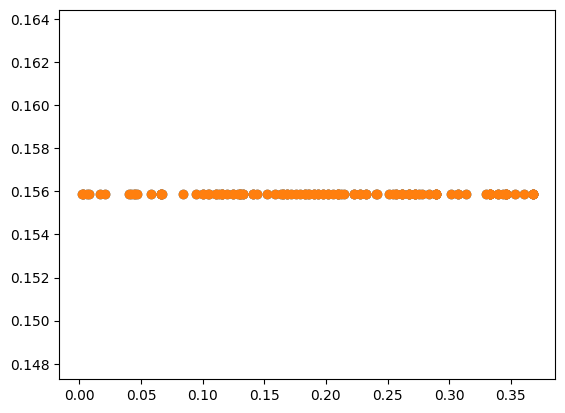

In [67]:
plt.scatter(dissimilarity_vec, preds)
plt.show()

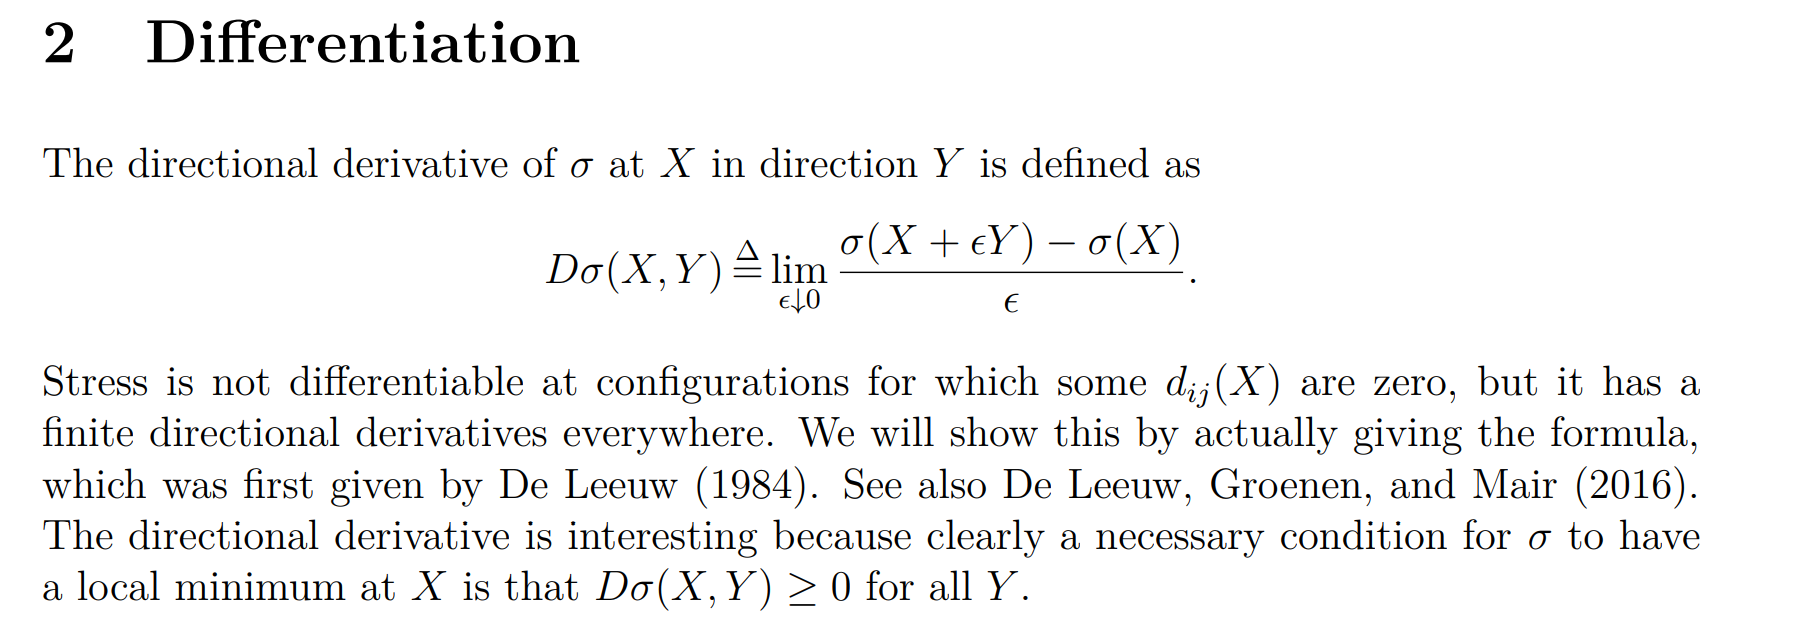
From https://jansweb.netlify.app/publication/deleeuw-e-18-c/

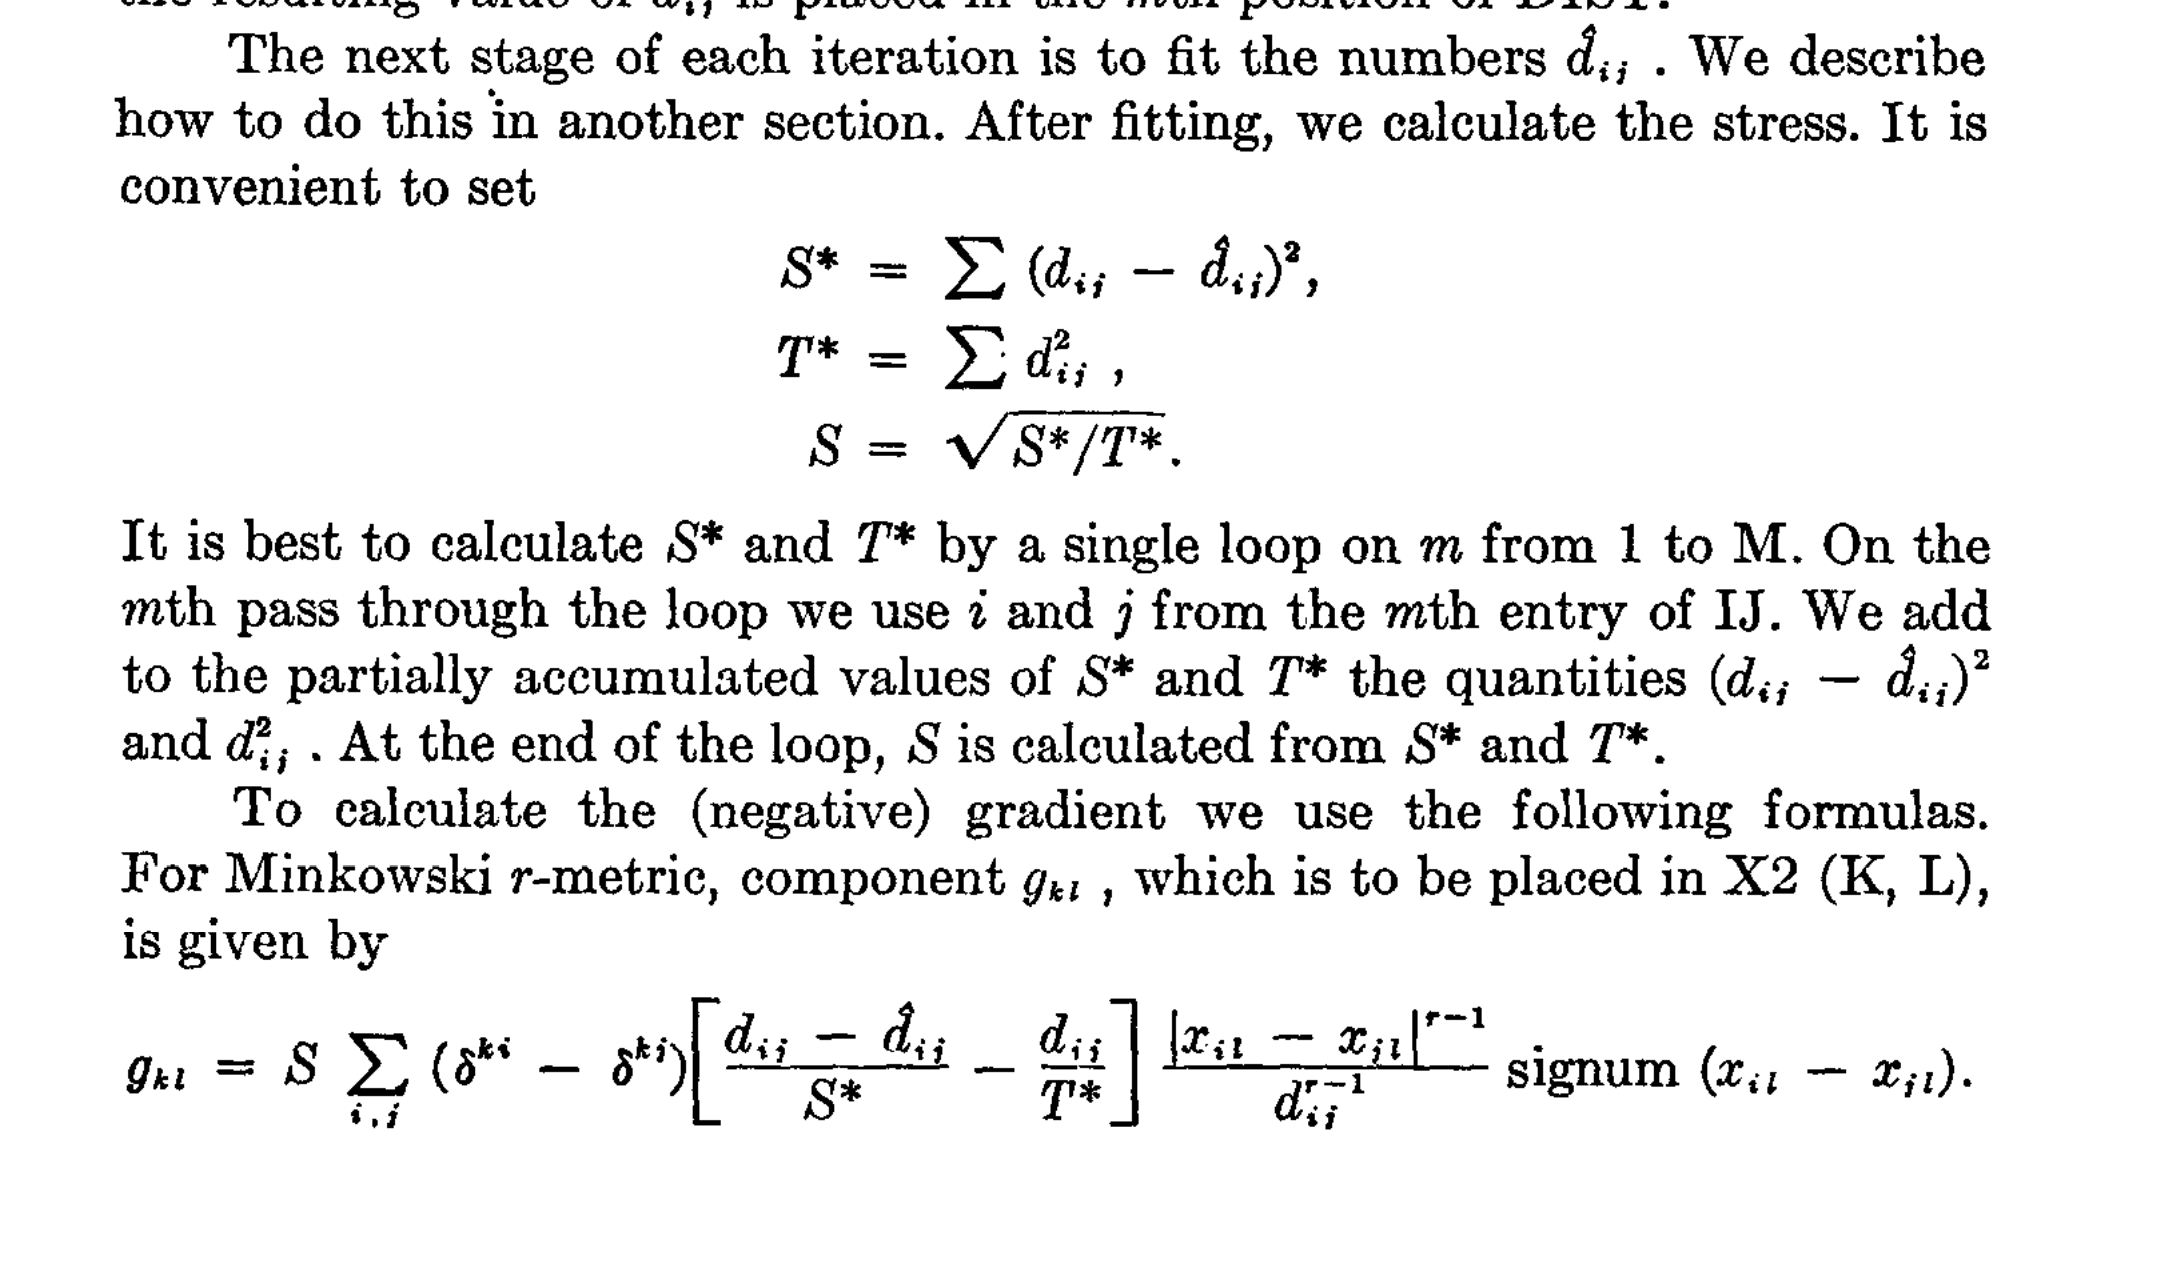
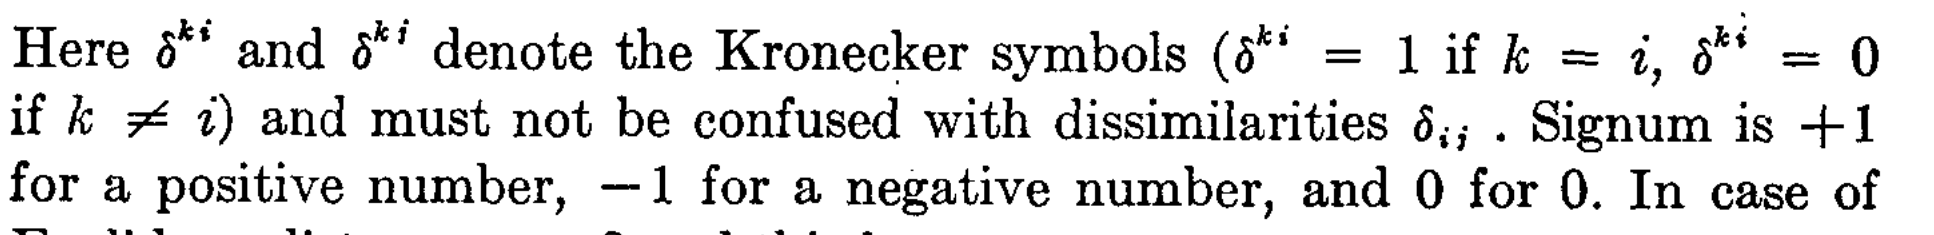
From Kruskal, 1964